In [8]:
import numpy as np
import os
import pandas as pd
import warnings
import seaborn as sn
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [9]:
# Read CSV into DataFrame
annualData = pd.read_csv("resources/annualAllStateData.csv")

# Drop the null rows
annualData = annualData.dropna()

# Display DataFrame
annualData

,State,Year,Transportation (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Vehicles,sq mi,tempHigh
0,Alabama,1994,32.389399,94803.0,4260229,9.682137e+06,2220444.0,4.895600e+04,3176560.0,50645.33,74.10
1,Alaska,1994,11.402707,26188.0,603308,3.097134e+06,273319.0,4.150000e+03,533496.0,570640.95,33.70
2,Arizona,1994,27.085805,104104.0,4245089,5.289982e+07,1899942.0,3.877400e+04,2813460.0,113594.08,74.70
3,Arkansas,1994,19.010329,53641.0,2494019,4.535502e+06,1286100.0,2.494800e+04,1566840.0,52035.48,71.10
4,California,1994,206.555572,904778.0,31484435,1.130728e+09,12932907.0,2.719430e+05,22338870.0,155779.22,70.60
...,...,...,...,...,...,...,...,...,...,...,...
1269,Washington,2018,47.607909,524486.9,7523869,2.702230e+08,2765858.0,6.236666e+04,7152413.0,66455.52,57.70
1270,West Virginia,2018,13.154700,71858.7,1804291,7.762619e+06,791672.0,1.944732e+04,1693719.0,24038.21,63.30
1271,Wisconsin,2018,31.257005,303767.4,5807406,5.896453e+07,2491234.0,6.588543e+04,5683061.0,54157.80,53.10
1272,Wyoming,2018,8.110488,38696.3,577601,2.504852e+06,294731.0,1.043844e+04,837024.0,97093.14,55.50


In [10]:
# Drop row with United States totals data
annualData = annualData.loc[annualData['State'] != 'United States']

Feauture Selection:

In [11]:
# Set features to be used as x values
features = annualData.drop(columns=['Transportation (MtCO2e)','State', 'Year'])
X = features
X.head()

,State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Vehicles,sq mi,tempHigh
0,94803.0,4260229,9.682137e+06,2220444.0,48956.0,3176560.0,50645.33,74.1
1,26188.0,603308,3.097134e+06,273319.0,4150.0,533496.0,570640.95,33.7
2,104104.0,4245089,5.289982e+07,1899942.0,38774.0,2813460.0,113594.08,74.7
3,53641.0,2494019,4.535502e+06,1286100.0,24948.0,1566840.0,52035.48,71.1
4,904778.0,31484435,1.130728e+09,12932907.0,271943.0,22338870.0,155779.22,70.6


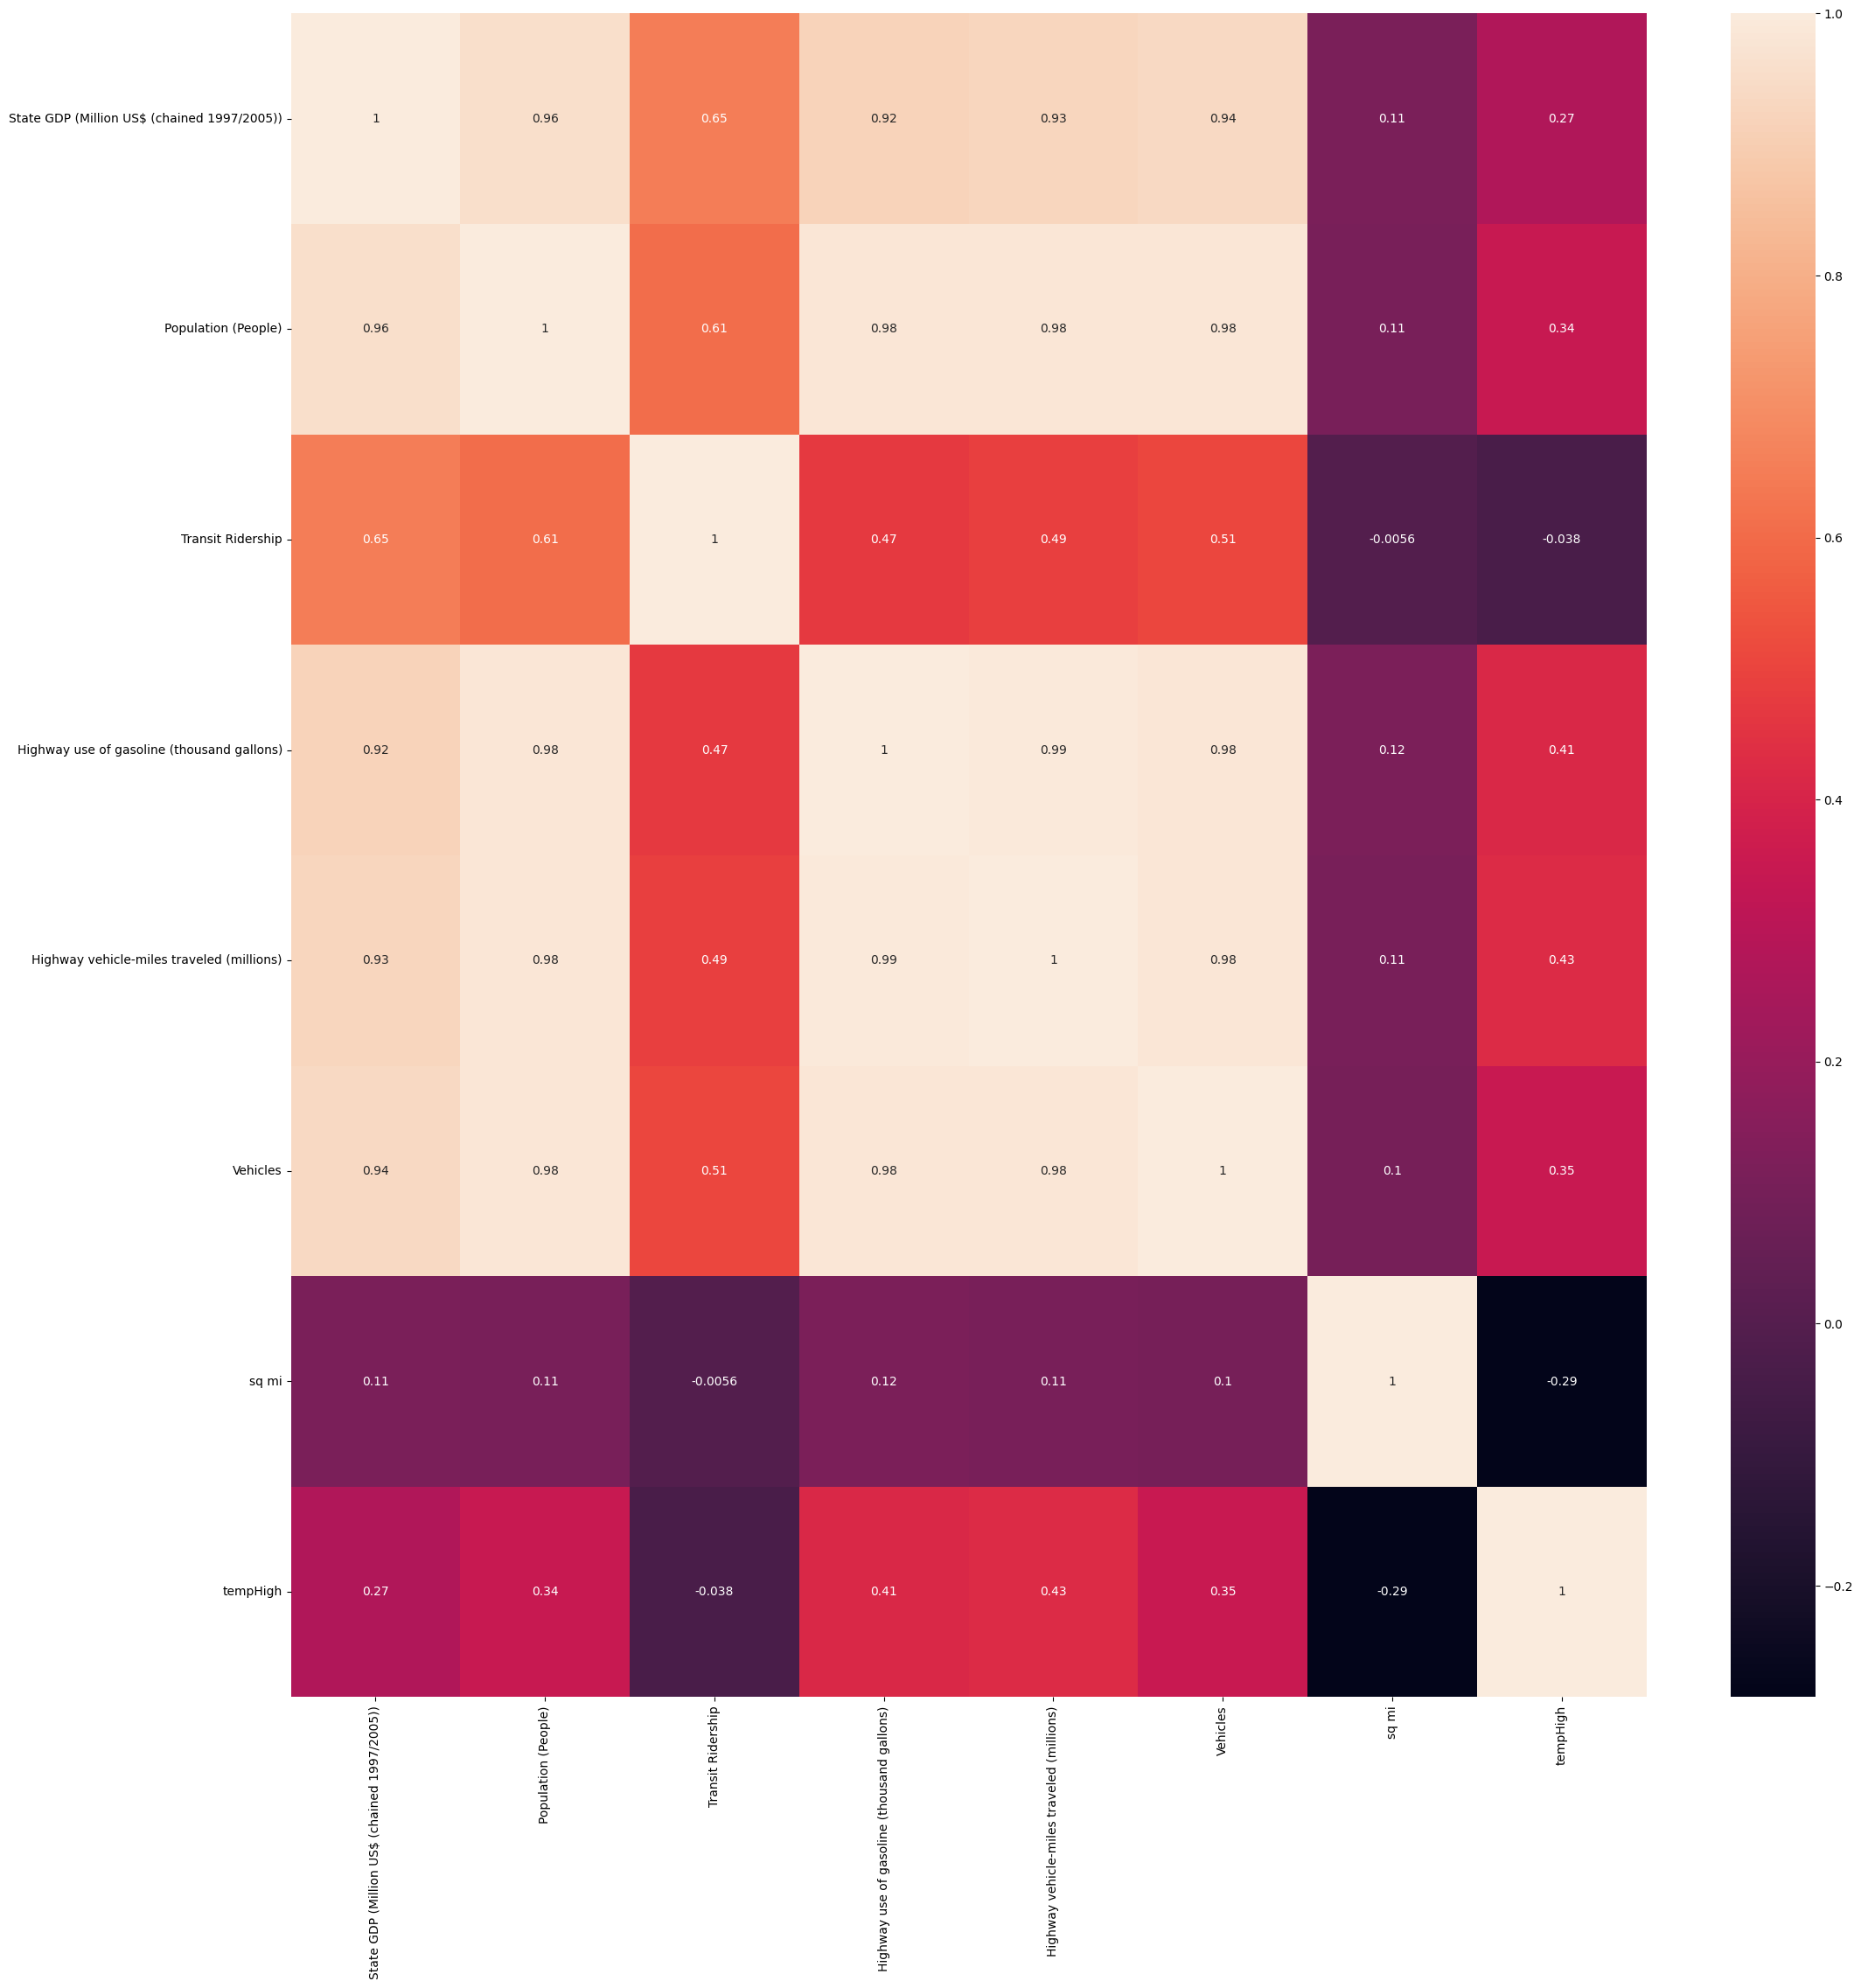

In [12]:
# Develop correlation matrix
X.corr()
corrMatrix = X.corr()

# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/mnCorr.png")

plt.show()

In [13]:
# Re-set features to be used as x values, given above correlation
features = annualData.drop(columns=['Transportation (MtCO2e)','State', 'Highway use of gasoline (thousand gallons)', 'Vehicles', 'Year'])
X = features
X.head()

,State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway vehicle-miles traveled (millions),sq mi,tempHigh
0,94803.0,4260229,9.682137e+06,48956.0,50645.33,74.1
1,26188.0,603308,3.097134e+06,4150.0,570640.95,33.7
2,104104.0,4245089,5.289982e+07,38774.0,113594.08,74.7
3,53641.0,2494019,4.535502e+06,24948.0,52035.48,71.1
4,904778.0,31484435,1.130728e+09,271943.0,155779.22,70.6


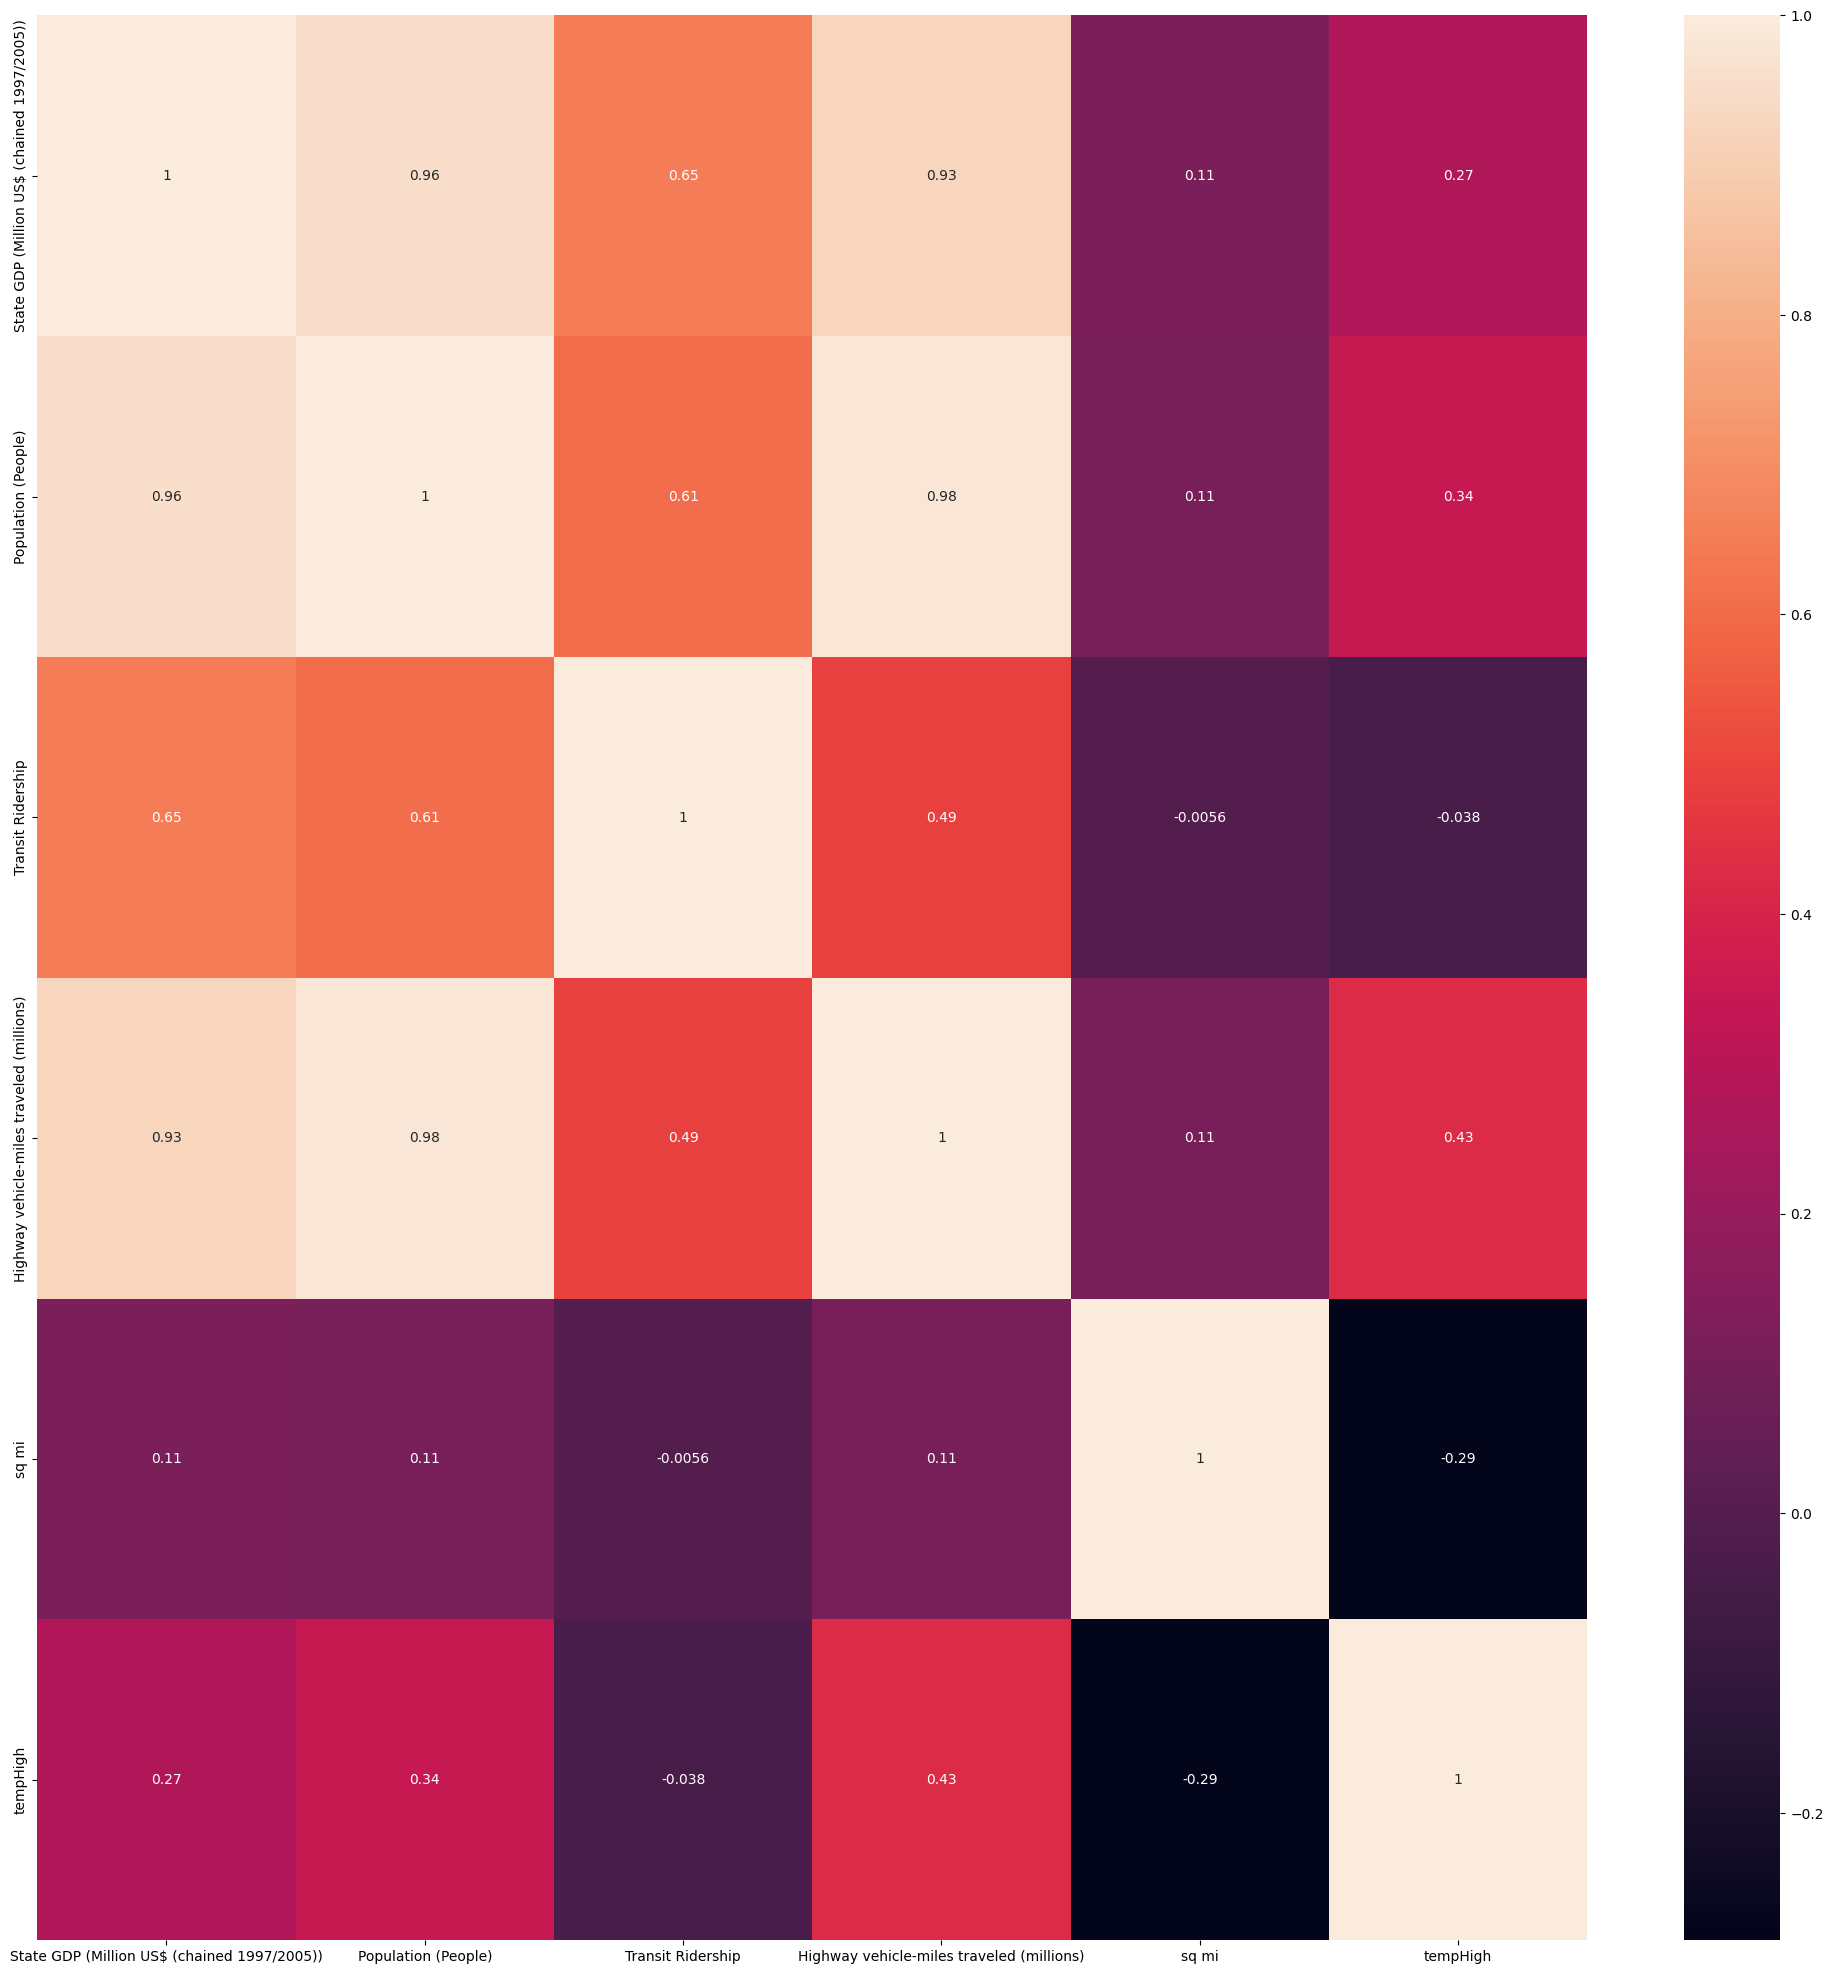

In [14]:
# Re-develop correlation matrix with new features
X.corr()
corrMatrix = X.corr()

# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/mnCorr.png")

plt.show()

##Multiple Linear Regression Model:

Create a Train-Test Split
Use Transportation (MtCO2e) for the y values.

In [15]:
# Set y values
y = annualData['Transportation (MtCO2e)'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1224, 6) (1224, 1)


In [16]:
print(y)

[[32.38939867]
 [11.40270658]
 [27.08580517]
 ...
 [13.15470028]
 [31.25700488]
 [ 8.11048825]]


In [33]:
# Dependencies and setup
from sklearn.model_selection import train_test_split

# Use train-test split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway vehicle-miles traveled (millions),sq mi,tempHigh
31,596435.0,18459470,2.349900e+09,112970.00000,47126.40,54.7
251,186541.0,5297672,9.518144e+07,56655.00000,54157.80,57.4
484,70242.0,1738643,6.222364e+06,19016.00000,76824.17,62.6
141,19410.0,742213,8.495030e+05,7817.00000,75811.00,53.0
1073,112938.9,2978048,6.694851e+06,34897.33423,52035.48,71.9



Pre-Processing
Scale the data using the StandardScaler and perform some feature selection.

In [34]:
# Dependencies and setup
from sklearn.preprocessing import StandardScaler

# Scale data
X_scale = StandardScaler().fit(X_train)
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [35]:
# Display array of scaled values
X_train_scaled

array([[ 1.0387842 ,  1.89076542,  4.04511593,  0.92244036, -0.29077021,
        -0.96282467],
       [-0.23272792, -0.12253772, -0.17459654, -0.04008311, -0.20875444,
        -0.66223302],
       [-0.59349336, -0.66694695, -0.34108367, -0.68340053,  0.05563099,
        -0.08331577],
       ...,
       [ 7.34177851,  5.08759891,  2.12595742,  4.86879703,  0.97657973,
         1.04111966],
       [ 0.52998579,  0.41851727,  0.40034309,  0.24088472, -0.7546815 ,
         0.15047774],
       [-0.21054205, -0.18727065, -0.3380792 ,  0.19958205, -0.24972465,
         1.43077551]])

Train the Multiple Linear Regression Model

In [36]:
# Dependencies and setup
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
# Fit the model to the training data and calculate scores for training and testing data
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.956382427410011
Testing Score: 0.953817967738916


Coefficients (Independent Values)

In [38]:
# Display coefficient factors
print(model.coef_)

[[-1.12059706 36.59716076 -6.65646531  6.30468334  4.46556114  3.11017275]]


In [39]:
# Display full amount (not rounded)
model.coef_[0][0]

np.float64(-1.120597061249907)

In [40]:
# Display intercept
print(model.intercept_)

[38.87467442]


In [41]:
# Generate equation
print("The linear equation is: Y = {:.5} + {:.5}*GDP + {:.5}*Population + {:.5}*Transit + {:.5}*VMT + {:.5}*SQMI + {:.5}*Temp".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4], model.coef_[0][5]))

The linear equation is: Y = 38.875 + -1.1206*GDP + 36.597*Population + -6.6565*Transit + 6.3047*VMT + 4.4656*SQMI + 3.1102*Temp


In [42]:
# Define function to predict GHG values
def make_prediction(GDP, population, transit, VMT, SQMI, temperature, coefs, intercept):

    GHG = coefs[0][0] * GDP + coefs[0][1] * population + coefs[0][2] * transit + coefs[0][3] * VMT + coefs[0][4] * SQMI \
          + coefs[0][5] * temperature + intercept[0]
        
    return GHG

In [43]:
# Display prediction
row = 0
GDP_param = X_test_scaled[row][0]
population_param = X_test_scaled[row][1]
transit_param = X_test_scaled[row][2]
VMT_param = X_test_scaled[row][3]
SQMI_param = X_test_scaled[row][4]
temperature_param = X_test_scaled[row][5]

make_prediction(GDP_param, population_param, transit_param, VMT_param, SQMI_param, temperature_param, model.coef_, model.intercept_)

np.float64(13.213505586036032)

Model Accuracy Tests

In [44]:

# R squared
model.score(X_test_scaled, y_test, sample_weight = None)

0.953817967738916

In [45]:

# Make predictions
predictions = model.predict(X_test_scaled)
predictions[:10]

array([[ 13.21350559],
       [ 12.63707102],
       [ 54.56146486],
       [168.24976787],
       [ 69.17802003],
       [ 22.58282139],
       [ 10.91935779],
       [ 32.05518002],
       [ 34.50114701],
       [ 33.0478583 ]])

In [46]:
# Display y test array of values
y_test[:10]

array([[ 12.80369547],
       [ 14.09660168],
       [ 60.65783737],
       [207.1970538 ],
       [ 69.47666777],
       [ 25.47875385],
       [ 10.95469455],
       [ 60.77204619],
       [ 32.85436401],
       [ 31.95376058]])

In [47]:
# Dependencies and setup
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate and display Mean Square Error
y_true = y_test
y_pred = predictions
mean_squared_error(y_true, y_pred)

np.float64(85.70827538721713)

In [48]:
# Calculate and display Mean Absolute Error
mean_absolute_error(y_true, y_pred)

np.float64(5.4765422805486255)

In [49]:
# Calculate and display Root Mean Square Error
np.sqrt(mean_squared_error(y_true, y_pred))

np.float64(9.257876397274762)


Forecasting Selected Features

In [50]:
# Read CSV into DataFrame
annualData = pd.read_csv("resources/annualAllStateData.csv")

# Display DataFrame
annualData

,State,Year,Transportation (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Vehicles,sq mi,tempHigh
0,Alabama,1994,32.389399,94803.0,4260229,9.682137e+06,2220444.0,4.895600e+04,3176560.0,50645.33,74.10
1,Alaska,1994,11.402707,26188.0,603308,3.097134e+06,273319.0,4.150000e+03,533496.0,570640.95,33.70
2,Arizona,1994,27.085805,104104.0,4245089,5.289982e+07,1899942.0,3.877400e+04,2813460.0,113594.08,74.70
3,Arkansas,1994,19.010329,53641.0,2494019,4.535502e+06,1286100.0,2.494800e+04,1566840.0,52035.48,71.10
4,California,1994,206.555572,904778.0,31484435,1.130728e+09,12932907.0,2.719430e+05,22338870.0,155779.22,70.60
...,...,...,...,...,...,...,...,...,...,...,...
1269,Washington,2018,47.607909,524486.9,7523869,2.702230e+08,2765858.0,6.236666e+04,7152413.0,66455.52,57.70
1270,West Virginia,2018,13.154700,71858.7,1804291,7.762619e+06,791672.0,1.944732e+04,1693719.0,24038.21,63.30
1271,Wisconsin,2018,31.257005,303767.4,5807406,5.896453e+07,2491234.0,6.588543e+04,5683061.0,54157.80,53.10
1272,Wyoming,2018,8.110488,38696.3,577601,2.504852e+06,294731.0,1.043844e+04,837024.0,97093.14,55.50


GDP

In [51]:
# Use pandas pivot function to shift annual values onto single row
GDP = annualData.pivot(index = "Year", columns = "State", values = "State GDP (Million US$ (chained 1997/2005))")

# Display DataFrame
GDP.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,94803.0,26188.0,104104.0,53641.0,904778.0,110529.0,121001.0,28750.0,345550.0,198125.0,...,136301.0,505162.0,7288327.0,44958.0,14178.0,188082.0,159470.0,35963.0,135190.0,15105.0
1995,98024.0,27608.0,112019.0,55836.0,940599.0,116821.0,128538.0,29941.0,358419.0,209292.0,...,140814.0,530666.0,7539096.0,48212.0,14211.0,193402.0,160182.0,36902.0,138010.0,15539.0
1996,101379.0,27271.0,120869.0,58346.0,978299.0,123144.0,131913.0,NaN,376851.0,223307.0,...,145391.0,562107.0,7871721.0,52980.0,14839.0,201703.0,169162.0,37750.0,144558.0,15968.0
1997,122541.0,37249.0,141474.0,71547.0,1190161.0,157345.0,164027.0,41934.0,478036.0,281022.0,...,181888.0,754194.0,9856166.0,68799.0,17302.0,257517.0,223784.0,47387.0,179537.0,21015.0
1998,126309.0,35341.0,154770.0,72648.0,1270101.0,166949.0,168753.0,43011.0,500547.0,296040.0,...,189286.0,801462.0,10281034.0,73231.0,18086.0,269698.0,237384.0,48361.0,186541.0,21560.0


In [52]:
# Convert index to its own column
GDP["Year"] = GDP.index

# Display DataFrame
GDP.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,94803.0,26188.0,104104.0,53641.0,904778.0,110529.0,121001.0,28750.0,345550.0,198125.0,...,505162.0,7288327.0,44958.0,14178.0,188082.0,159470.0,35963.0,135190.0,15105.0,1994
1995,98024.0,27608.0,112019.0,55836.0,940599.0,116821.0,128538.0,29941.0,358419.0,209292.0,...,530666.0,7539096.0,48212.0,14211.0,193402.0,160182.0,36902.0,138010.0,15539.0,1995
1996,101379.0,27271.0,120869.0,58346.0,978299.0,123144.0,131913.0,NaN,376851.0,223307.0,...,562107.0,7871721.0,52980.0,14839.0,201703.0,169162.0,37750.0,144558.0,15968.0,1996
1997,122541.0,37249.0,141474.0,71547.0,1190161.0,157345.0,164027.0,41934.0,478036.0,281022.0,...,754194.0,9856166.0,68799.0,17302.0,257517.0,223784.0,47387.0,179537.0,21015.0,1997
1998,126309.0,35341.0,154770.0,72648.0,1270101.0,166949.0,168753.0,43011.0,500547.0,296040.0,...,801462.0,10281034.0,73231.0,18086.0,269698.0,237384.0,48361.0,186541.0,21560.0,1998


In [53]:
# Create new DataFrame with only desired columns
gdpData = GDP[["Year", "United States"]].copy()

# Display DataFrame
gdpData.head()

State,Year,United States
Year,,
1994,1994,7288327.0
1995,1995,7539096.0
1996,1996,7871721.0
1997,1997,9856166.0
1998,1998,10281034.0


In [54]:
# Reset index in place
gdpData.reset_index(inplace = True, drop = True)

# Display DataFrame
gdpData.head()

State,Year,United States
0,1994,7288327.0
1,1995,7539096.0
2,1996,7871721.0
3,1997,9856166.0
4,1998,10281034.0


In [55]:
# Drop index label
gdpData.columns.name = None

# Display DataFrame
gdpData.head()

,Year,United States
0,1994,7288327.0
1,1995,7539096.0
2,1996,7871721.0
3,1997,9856166.0
4,1998,10281034.0


In [56]:
# Rename column
gdpData = gdpData.rename(columns = {"United States":"GDP"})

# Display DataFrame
gdpData

,Year,GDP
0,1994,7288327.0
1,1995,7539096.0
2,1996,7871721.0
3,1997,9856166.0
4,1998,10281034.0
5,1999,10771147.0
6,2000,11225406.0
7,2001,11365110.0
8,2002,11559801.0
9,2003,11809034.0



Population

In [58]:
# Use pandas pivot function to shift annual values onto single row
pop = annualData.pivot(index = "Year", columns = "State", values = "Population (People)")

# Display DataFrame
pop.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,4260229.0,603308.0,4245089.0,2494019.0,31484435.0,3724168.0,3316121.0,717545.0,14239444.0,7157165.0,...,5231438.0,18564062.0,263125821.0,1960446.0,583836.0,6593139.0,5375161.0,1820421.0,5133678.0,480283.0
1995,4296800.0,604412.0,4432499.0,2535399.0,31696582.0,3826653.0,3324144.0,729734.0,14537875.0,7328413.0,...,5326936.0,18958751.0,266278393.0,2014177.0,589002.0,6670693.0,5481027.0,1823700.0,5184836.0,485160.0
1996,4331102.0,608569.0,4586940.0,2572109.0,32018834.0,3919972.0,3336685.0,NaN,14853360.0,7501069.0,...,5416643.0,19340342.0,269394284.0,2067976.0,593701.0,6750884.0,5569753.0,1822808.0,5229986.0,488167.0
1997,4367935.0,612968.0,4736990.0,2601090.0,32486010.0,4018293.0,3349348.0,751487.0,15186304.0,7685099.0,...,5499233.0,19740317.0,272646925.0,2119784.0,597239.0,6829183.0,5674747.0,1819113.0,5266213.0,489451.0
1998,4404701.0,619932.0,4883342.0,2626289.0,32987675.0,4116639.0,3365352.0,763335.0,15486559.0,7863536.0,...,5570045.0,20157531.0,275854104.0,2165960.0,600416.0,6900918.0,5769562.0,1815609.0,5297672.0,490787.0


In [59]:
# Convert index to its own column
pop["Year"] = pop.index

# Display DataFrame
pop.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,4260229.0,603308.0,4245089.0,2494019.0,31484435.0,3724168.0,3316121.0,717545.0,14239444.0,7157165.0,...,18564062.0,263125821.0,1960446.0,583836.0,6593139.0,5375161.0,1820421.0,5133678.0,480283.0,1994
1995,4296800.0,604412.0,4432499.0,2535399.0,31696582.0,3826653.0,3324144.0,729734.0,14537875.0,7328413.0,...,18958751.0,266278393.0,2014177.0,589002.0,6670693.0,5481027.0,1823700.0,5184836.0,485160.0,1995
1996,4331102.0,608569.0,4586940.0,2572109.0,32018834.0,3919972.0,3336685.0,NaN,14853360.0,7501069.0,...,19340342.0,269394284.0,2067976.0,593701.0,6750884.0,5569753.0,1822808.0,5229986.0,488167.0,1996
1997,4367935.0,612968.0,4736990.0,2601090.0,32486010.0,4018293.0,3349348.0,751487.0,15186304.0,7685099.0,...,19740317.0,272646925.0,2119784.0,597239.0,6829183.0,5674747.0,1819113.0,5266213.0,489451.0,1997
1998,4404701.0,619932.0,4883342.0,2626289.0,32987675.0,4116639.0,3365352.0,763335.0,15486559.0,7863536.0,...,20157531.0,275854104.0,2165960.0,600416.0,6900918.0,5769562.0,1815609.0,5297672.0,490787.0,1998


In [60]:
# Create new DataFrame with only desired columns
popData = pop[["Year", "United States"]].copy()

# Display DataFrame
popData.head()

State,Year,United States
Year,,
1994,1994,263125821.0
1995,1995,266278393.0
1996,1996,269394284.0
1997,1997,272646925.0
1998,1998,275854104.0


In [61]:
# Reset index in place
popData.reset_index(inplace = True, drop = True)

# Display DataFrame
popData.head()

State,Year,United States
0,1994,263125821.0
1,1995,266278393.0
2,1996,269394284.0
3,1997,272646925.0
4,1998,275854104.0


In [62]:
# Drop index label
popData.columns.name = None

# Display DataFrame
popData.head()

,Year,United States
0,1994,263125821.0
1,1995,266278393.0
2,1996,269394284.0
3,1997,272646925.0
4,1998,275854104.0


In [63]:
# Rename column
popData = popData.rename(columns = {"United States":"Population"})

# Display DataFrame
popData

,Year,Population
0,1994,263125821.0
1,1995,266278393.0
2,1996,269394284.0
3,1997,272646925.0
4,1998,275854104.0
5,1999,279040168.0
6,2000,282162411.0
7,2001,284968955.0
8,2002,287625193.0
9,2003,290107933.0


Mass Transit Ridership

In [64]:
# Use pandas pivot function to shift annual values onto single row
bus = annualData.pivot(index = "Year", columns = "State", values = "Transit Ridership")

# Display DataFrame
bus.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,9682137.0,3097134.0,52899819.0,4535502.0,1.130728e+09,69680633.0,46291799.0,6224272.0,170739024.0,156102067.0,...,25953968.0,254755027.0,7.701631e+09,25567612.0,1517630.0,41595995.0,147542417.0,3538230.0,77470546.0,264278.0
1995,9712920.0,3083778.0,54295517.0,4318941.0,1.097729e+09,74224757.0,46573453.0,7110318.0,172168139.0,156300849.0,...,27764882.0,251373449.0,7.503673e+09,25962871.0,1610893.0,41625868.0,149290759.0,3171953.0,78892986.0,229894.0
1996,5811397.0,3164082.0,52335946.0,5457257.0,1.130123e+09,76498102.0,40588053.0,NaN,169782749.0,157700825.0,...,25518205.0,220611586.0,7.564571e+09,25317908.0,1627718.0,44606146.0,160520580.0,3084096.0,83639258.0,212584.0
1997,30766361.0,3290397.0,53644217.0,5538620.0,1.182133e+09,77996511.0,41222765.0,7413311.0,175776980.0,181752569.0,...,24910173.0,260720872.0,7.982371e+09,25980312.0,1632313.0,40405191.0,170863509.0,3153422.0,93618372.0,164426.0
1998,2792639.0,3421082.0,52713456.0,5324500.0,1.236435e+09,78517246.0,44400027.0,7753591.0,180932359.0,169444146.0,...,23526820.0,269380559.0,8.115118e+09,25779227.0,1582389.0,49136033.0,169446275.0,3075684.0,95181435.0,153642.0


In [65]:
# Convert index to its own column
bus["Year"] = bus.index

# Display DataFrame
bus.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,9682137.0,3097134.0,52899819.0,4535502.0,1.130728e+09,69680633.0,46291799.0,6224272.0,170739024.0,156102067.0,...,254755027.0,7.701631e+09,25567612.0,1517630.0,41595995.0,147542417.0,3538230.0,77470546.0,264278.0,1994
1995,9712920.0,3083778.0,54295517.0,4318941.0,1.097729e+09,74224757.0,46573453.0,7110318.0,172168139.0,156300849.0,...,251373449.0,7.503673e+09,25962871.0,1610893.0,41625868.0,149290759.0,3171953.0,78892986.0,229894.0,1995
1996,5811397.0,3164082.0,52335946.0,5457257.0,1.130123e+09,76498102.0,40588053.0,NaN,169782749.0,157700825.0,...,220611586.0,7.564571e+09,25317908.0,1627718.0,44606146.0,160520580.0,3084096.0,83639258.0,212584.0,1996
1997,30766361.0,3290397.0,53644217.0,5538620.0,1.182133e+09,77996511.0,41222765.0,7413311.0,175776980.0,181752569.0,...,260720872.0,7.982371e+09,25980312.0,1632313.0,40405191.0,170863509.0,3153422.0,93618372.0,164426.0,1997
1998,2792639.0,3421082.0,52713456.0,5324500.0,1.236435e+09,78517246.0,44400027.0,7753591.0,180932359.0,169444146.0,...,269380559.0,8.115118e+09,25779227.0,1582389.0,49136033.0,169446275.0,3075684.0,95181435.0,153642.0,1998


In [66]:
# Create new DataFrame with only desired columns
busData = bus[["Year", "United States"]].copy()

# Display DataFrame
busData.head()

State,Year,United States
Year,,
1994,1994,7.701631e+09
1995,1995,7.503673e+09
1996,1996,7.564571e+09
1997,1997,7.982371e+09
1998,1998,8.115118e+09


In [67]:
# Reset index in place
busData.reset_index(inplace = True, drop = True)

# Display DataFrame
busData.head()

State,Year,United States
0,1994,7.701631e+09
1,1995,7.503673e+09
2,1996,7.564571e+09
3,1997,7.982371e+09
4,1998,8.115118e+09


In [68]:
# Drop index label
busData.columns.name = None

# Display DataFrame
busData.head()

,Year,United States
0,1994,7.701631e+09
1,1995,7.503673e+09
2,1996,7.564571e+09
3,1997,7.982371e+09
4,1998,8.115118e+09


In [69]:
# Rename column
busData = busData.rename(columns = {"United States":"transitRiders"})

# Display DataFrame
busData

,Year,transitRiders
0,1994,7.701631e+09
1,1995,7.503673e+09
2,1996,7.564571e+09
3,1997,7.982371e+09
4,1998,8.115118e+09
5,1999,8.521548e+09
6,2000,8.719891e+09
7,2001,9.007786e+09
8,2002,9.017976e+09
9,2003,8.876036e+09



Vehicle Miles Traveled

In [70]:
# Use pandas pivot function to shift annual values onto single row
vmt = annualData.pivot(index = "Year", columns = "State", values = "Highway vehicle-miles traveled (millions)")

# Display DataFrame
vmt.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,48956.0,4150.0,38774.0,24948.0,271943.0,33705.0,27138.0,7025.0,121989.0,82822.0,...,54524.0,178348.0,2359984.0,18078.0,6152.0,67609.0,47428.0,17112.0,50273.0,6689.0
1995,50628.0,4123.0,39653.0,26653.0,276371.0,35058.0,28045.0,7515.0,127801.0,85384.0,...,56214.0,181096.0,2422775.0,18781.0,6206.0,69811.0,49250.0,17421.0,51396.0,7044.0
1996,51433.0,4115.0,42123.0,27809.0,278043.0,36141.0,28135.0,NaN,130004.0,89132.0,...,58435.0,185386.0,2484080.0,19539.0,6377.0,71302.0,49405.0,17693.0,52782.0,7360.0
1997,53458.0,4387.0,43491.0,28076.0,279096.0,37746.0,28552.0,8008.0,134027.0,93530.0,...,60526.0,198702.0,2552233.0,20444.0,6466.0,70320.0,51068.0,18324.0,54405.0,7576.0
1998,55205.0,4514.0,45158.0,28346.0,290630.0,39283.0,29322.0,8204.0,137543.0,96433.0,...,62562.0,206023.0,2628148.0,21270.0,6596.0,72679.0,51927.0,18666.0,56655.0,8031.0


In [71]:
# Convert index to its own column
vmt["Year"] = vmt.index

# Display DataFrame
vmt.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,48956.0,4150.0,38774.0,24948.0,271943.0,33705.0,27138.0,7025.0,121989.0,82822.0,...,178348.0,2359984.0,18078.0,6152.0,67609.0,47428.0,17112.0,50273.0,6689.0,1994
1995,50628.0,4123.0,39653.0,26653.0,276371.0,35058.0,28045.0,7515.0,127801.0,85384.0,...,181096.0,2422775.0,18781.0,6206.0,69811.0,49250.0,17421.0,51396.0,7044.0,1995
1996,51433.0,4115.0,42123.0,27809.0,278043.0,36141.0,28135.0,NaN,130004.0,89132.0,...,185386.0,2484080.0,19539.0,6377.0,71302.0,49405.0,17693.0,52782.0,7360.0,1996
1997,53458.0,4387.0,43491.0,28076.0,279096.0,37746.0,28552.0,8008.0,134027.0,93530.0,...,198702.0,2552233.0,20444.0,6466.0,70320.0,51068.0,18324.0,54405.0,7576.0,1997
1998,55205.0,4514.0,45158.0,28346.0,290630.0,39283.0,29322.0,8204.0,137543.0,96433.0,...,206023.0,2628148.0,21270.0,6596.0,72679.0,51927.0,18666.0,56655.0,8031.0,1998


In [72]:
# Create new DataFrame with only desired columns
vmtData = vmt[["Year", "United States"]].copy()

# Display DataFrame
vmtData.head()

State,Year,United States
Year,,
1994,1994,2359984.0
1995,1995,2422775.0
1996,1996,2484080.0
1997,1997,2552233.0
1998,1998,2628148.0


In [73]:
# Reset index in place
vmtData.reset_index(inplace = True, drop = True)

# Display DataFrame
vmtData.head()

State,Year,United States
0,1994,2359984.0
1,1995,2422775.0
2,1996,2484080.0
3,1997,2552233.0
4,1998,2628148.0


In [74]:
# Drop index label
vmtData.columns.name = None

# Display DataFrame
vmtData.head()

,Year,United States
0,1994,2359984.0
1,1995,2422775.0
2,1996,2484080.0
3,1997,2552233.0
4,1998,2628148.0


In [75]:
# Rename column
vmtData = vmtData.rename(columns = {"United States":"VMT"})

# Display DataFrame
vmtData

,Year,VMT
0,1994,2359984.000
1,1995,2422775.000
2,1996,2484080.000
3,1997,2552233.000
4,1998,2628148.000
5,1999,2690241.000
6,2000,2746925.000
7,2001,2797339.000
8,2002,2855756.000
9,2003,2890893.000


Landmass Area

In [76]:
# Use pandas pivot function to shift annual values onto single row
sqmi = annualData.pivot(index = "Year", columns = "State", values = "sq mi")

# Display DataFrame
sqmi.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,41234.9,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14
1995,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,41234.9,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14
1996,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,NaN,53624.76,57513.49,...,41234.9,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14
1997,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,41234.9,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14
1998,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,41234.9,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14


In [77]:
# Convert index to its own column
sqmi["Year"] = sqmi.index

# Display DataFrame
sqmi.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14,1994
1995,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14,1995
1996,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,NaN,53624.76,57513.49,...,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14,1996
1997,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14,1997
1998,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,261231.71,3531905.43,82169.62,9216.66,39490.09,66455.52,24038.21,54157.8,97093.14,1998


In [78]:
# Create new DataFrame with only desired columns
sqmiData = sqmi[["Year", "United States"]].copy()

# Display DataFrame
sqmiData.head()

State,Year,United States
Year,,
1994,1994,3531905.43
1995,1995,3531905.43
1996,1996,3531905.43
1997,1997,3531905.43
1998,1998,3531905.43


In [79]:
# Reset index in place
sqmiData.reset_index(inplace = True, drop = True)

# Display DataFrame
sqmiData.head()

State,Year,United States
0,1994,3531905.43
1,1995,3531905.43
2,1996,3531905.43
3,1997,3531905.43
4,1998,3531905.43


In [80]:
# Drop index label
sqmiData.columns.name = None

# Display DataFrame
sqmiData.head()

,Year,United States
0,1994,3531905.43
1,1995,3531905.43
2,1996,3531905.43
3,1997,3531905.43
4,1998,3531905.43


In [81]:
# Rename column
sqmiData = sqmiData.rename(columns = {"United States":"SQMI"})

# Display DataFrame
sqmiData

,Year,SQMI
0,1994,3531905.43
1,1995,3531905.43
2,1996,3531905.43
3,1997,3531905.43
4,1998,3531905.43
5,1999,3531905.43
6,2000,3531905.43
7,2001,3531905.43
8,2002,3531905.43
9,2003,3531905.43


Temperatures

In [82]:
# Use pandas pivot function to shift annual values onto single row
temps = annualData.pivot(index = "Year", columns = "State", values = "tempHigh")

# Display DataFrame
temps.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,74.1,33.7,74.7,71.1,70.6,60.4,59.4,65.4,81.5,74.6,...,68.8,77.8,64.80,62.4,52.1,66.7,57.8,63.2,53.4,56.1
1995,74.6,35.1,75.2,71.7,71.0,59.2,59.3,65.2,81.2,74.9,...,68.7,77.6,64.34,61.9,52.8,65.9,57.1,62.5,52.7,54.0
1996,73.7,33.1,76.4,70.4,71.9,59.7,58.1,NaN,80.7,74.4,...,67.5,78.4,63.71,62.6,51.8,64.6,55.2,61.2,50.7,54.0
1997,73.5,36.0,74.5,70.4,71.5,58.1,58.8,64.9,81.6,74.4,...,67.6,75.6,63.72,60.6,51.6,65.7,56.4,61.8,52.5,53.8
1998,76.3,35.6,73.2,73.6,68.2,59.6,61.6,67.5,82.8,76.9,...,70.8,79.3,65.63,60.5,55.3,68.5,58.1,65.0,57.4,54.8


In [83]:
# Convert index to its own column
temps["Year"] = temps.index

# Display DataFrame
temps.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,74.1,33.7,74.7,71.1,70.6,60.4,59.4,65.4,81.5,74.6,...,77.8,64.80,62.4,52.1,66.7,57.8,63.2,53.4,56.1,1994
1995,74.6,35.1,75.2,71.7,71.0,59.2,59.3,65.2,81.2,74.9,...,77.6,64.34,61.9,52.8,65.9,57.1,62.5,52.7,54.0,1995
1996,73.7,33.1,76.4,70.4,71.9,59.7,58.1,NaN,80.7,74.4,...,78.4,63.71,62.6,51.8,64.6,55.2,61.2,50.7,54.0,1996
1997,73.5,36.0,74.5,70.4,71.5,58.1,58.8,64.9,81.6,74.4,...,75.6,63.72,60.6,51.6,65.7,56.4,61.8,52.5,53.8,1997
1998,76.3,35.6,73.2,73.6,68.2,59.6,61.6,67.5,82.8,76.9,...,79.3,65.63,60.5,55.3,68.5,58.1,65.0,57.4,54.8,1998


In [84]:
# Create new DataFrame with only desired columns
tempsData = temps[["Year", "United States"]].copy()

# Display DataFrame
tempsData.head()

State,Year,United States
Year,,
1994,1994,64.80
1995,1995,64.34
1996,1996,63.71
1997,1997,63.72
1998,1998,65.63


In [85]:
# Reset index in place
tempsData.reset_index(inplace = True, drop = True)

# Display DataFrame
tempsData.head()

State,Year,United States
0,1994,64.80
1,1995,64.34
2,1996,63.71
3,1997,63.72
4,1998,65.63


In [86]:
# Drop index label
tempsData.columns.name = None

# Display DataFrame
tempsData.head()

,Year,United States
0,1994,64.80
1,1995,64.34
2,1996,63.71
3,1997,63.72
4,1998,65.63


In [87]:
# Rename column
tempsData = tempsData.rename(columns = {"United States":"Temps"})

# Display DataFrame
tempsData

,Year,Temps
0,1994,64.80
1,1995,64.34
2,1996,63.71
3,1997,63.72
4,1998,65.63
5,1999,66.20
6,2000,65.31
7,2001,65.64
8,2002,65.19
9,2003,65.11


GHG Emissions

In [88]:
# Use pandas pivot function to shift annual values onto single row
ghg = annualData.pivot(index = "Year", columns = "State", values = "Transportation (MtCO2e)")

# Display DataFrame
ghg.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1994,32.389399,11.402707,27.085805,19.010329,206.555572,22.944272,15.616747,4.803474,88.797170,56.784218,...,37.197205,162.405677,1733.985207,12.554784,3.643656,44.229789,44.975004,12.695727,28.721214,6.098043
1995,33.939181,12.549219,27.578721,19.426997,210.590234,23.680334,15.381835,4.580265,91.184699,59.453647,...,39.142561,160.265182,1769.764496,13.613448,3.780714,45.019258,47.120433,12.832016,29.297354,7.031061
1996,33.348194,12.230312,29.292379,19.831062,214.585789,24.227576,16.189621,NaN,92.122598,62.925565,...,40.492995,173.777756,1820.218096,14.267187,3.924774,45.492627,46.505445,11.617768,29.752413,7.047666
1997,32.989637,13.724764,29.322015,20.387979,209.278368,24.074462,16.218494,4.950119,95.347918,60.657837,...,40.860765,178.537568,1840.662981,14.869087,3.852537,46.791202,47.593510,12.638748,29.899735,7.160281
1998,33.596997,13.989794,31.522052,20.590682,209.905133,25.219161,16.446428,4.986727,96.764321,62.705792,...,41.758102,187.611841,1877.582343,15.117637,3.806338,47.449721,44.908224,13.230040,31.497489,7.366215


In [89]:
# Convert index to its own column
ghg["Year"] = ghg.index

# Display DataFrame
ghg.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,32.389399,11.402707,27.085805,19.010329,206.555572,22.944272,15.616747,4.803474,88.797170,56.784218,...,162.405677,1733.985207,12.554784,3.643656,44.229789,44.975004,12.695727,28.721214,6.098043,1994
1995,33.939181,12.549219,27.578721,19.426997,210.590234,23.680334,15.381835,4.580265,91.184699,59.453647,...,160.265182,1769.764496,13.613448,3.780714,45.019258,47.120433,12.832016,29.297354,7.031061,1995
1996,33.348194,12.230312,29.292379,19.831062,214.585789,24.227576,16.189621,NaN,92.122598,62.925565,...,173.777756,1820.218096,14.267187,3.924774,45.492627,46.505445,11.617768,29.752413,7.047666,1996
1997,32.989637,13.724764,29.322015,20.387979,209.278368,24.074462,16.218494,4.950119,95.347918,60.657837,...,178.537568,1840.662981,14.869087,3.852537,46.791202,47.593510,12.638748,29.899735,7.160281,1997
1998,33.596997,13.989794,31.522052,20.590682,209.905133,25.219161,16.446428,4.986727,96.764321,62.705792,...,187.611841,1877.582343,15.117637,3.806338,47.449721,44.908224,13.230040,31.497489,7.366215,1998


In [90]:
# Create new DataFrame with only desired columns
ghgData = ghg[["Year", "United States"]].copy()

# Display DataFrame
ghgData.head()

State,Year,United States
Year,,
1994,1994,1733.985207
1995,1995,1769.764496
1996,1996,1820.218096
1997,1997,1840.662981
1998,1998,1877.582343


In [91]:
# Reset index in place
ghgData.reset_index(inplace = True, drop = True)

# Display DataFrame
ghgData.head()

State,Year,United States
0,1994,1733.985207
1,1995,1769.764496
2,1996,1820.218096
3,1997,1840.662981
4,1998,1877.582343


In [92]:
# Drop index label
ghgData.columns.name = None

# Display DataFrame
ghgData.head()

,Year,United States
0,1994,1733.985207
1,1995,1769.764496
2,1996,1820.218096
3,1997,1840.662981
4,1998,1877.582343


In [93]:
# Rename column
ghgData = ghgData.rename(columns = {"United States":"Emissions"})

# Display DataFrame
ghgData

,Year,Emissions
0,1994,1733.985207
1,1995,1769.764496
2,1996,1820.218096
3,1997,1840.662981
4,1998,1877.582343
5,1999,1921.589895
6,2000,1962.805129
7,2001,1937.856043
8,2002,1972.065873
9,2003,1966.850091


Merge all DataFrames

In [94]:
# Merge DataFrames
trendData = pd.merge(gdpData, popData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,Population
0,1994,7288327.0,263125821.0
1,1995,7539096.0,266278393.0
2,1996,7871721.0,269394284.0
3,1997,9856166.0,272646925.0
4,1998,10281034.0,275854104.0


In [95]:
# Merge DataFrames
trendData = trendData.merge(busData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,Population,transitRiders
0,1994,7288327.0,263125821.0,7.701631e+09
1,1995,7539096.0,266278393.0,7.503673e+09
2,1996,7871721.0,269394284.0,7.564571e+09
3,1997,9856166.0,272646925.0,7.982371e+09
4,1998,10281034.0,275854104.0,8.115118e+09


In [96]:
# Merge DataFrames
trendData = trendData.merge(vmtData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,Population,transitRiders,VMT
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.0
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.0
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.0
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.0
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.0


In [97]:
# Merge DataFrames
trendData = trendData.merge(sqmiData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,Population,transitRiders,VMT,SQMI
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.0,3531905.43
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.0,3531905.43
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.0,3531905.43
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.0,3531905.43
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.0,3531905.43


In [98]:
# Merge DataFrames
trendData = trendData.merge(tempsData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.0,3531905.43,64.80
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.0,3531905.43,64.34
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.0,3531905.43,63.71
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.0,3531905.43,63.72
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.0,3531905.43,65.63


In [99]:
# Merge DataFrames
trendData = trendData.merge(ghgData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps,Emissions
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.000,3531905.43,64.80,1733.985207
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.000,3531905.43,64.34,1769.764496
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.000,3531905.43,63.71,1820.218096
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.000,3531905.43,63.72,1840.662981
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.000,3531905.43,65.63,1877.582343
5,1999,10771147.0,279040168.0,8.521548e+09,2690241.000,3531905.43,66.20,1921.589895
6,2000,11225406.0,282162411.0,8.719891e+09,2746925.000,3531905.43,65.31,1962.805129
7,2001,11365110.0,284968955.0,9.007786e+09,2797339.000,3531905.43,65.64,1937.856043
8,2002,11559801.0,287625193.0,9.017976e+09,2855756.000,3531905.43,65.19,1972.065873
9,2003,11809034.0,290107933.0,8.876036e+09,2890893.000,3531905.43,65.11,1966.850091


In [100]:
# Rename column
trendData = trendData.rename(columns = {"Emissions":"actualGHG"})

# Display DataFrame
trendData

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps,actualGHG
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.000,3531905.43,64.80,1733.985207
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.000,3531905.43,64.34,1769.764496
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.000,3531905.43,63.71,1820.218096
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.000,3531905.43,63.72,1840.662981
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.000,3531905.43,65.63,1877.582343
5,1999,10771147.0,279040168.0,8.521548e+09,2690241.000,3531905.43,66.20,1921.589895
6,2000,11225406.0,282162411.0,8.719891e+09,2746925.000,3531905.43,65.31,1962.805129
7,2001,11365110.0,284968955.0,9.007786e+09,2797339.000,3531905.43,65.64,1937.856043
8,2002,11559801.0,287625193.0,9.017976e+09,2855756.000,3531905.43,65.19,1972.065873
9,2003,11809034.0,290107933.0,8.876036e+09,2890893.000,3531905.43,65.11,1966.850091


In [101]:
# Export to CSV
trendData.to_csv("resources/trendData.csv", index = False, header = True)

Scaling Forecasted Selected Features (X Values)

In [102]:
# Read forecasted CSV into DataFrame
scaledData = pd.read_csv("resources/trendDataForecasts.csv")

# Display DataFrame
scaledData

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps,actualGHG
0,1994,7288327.00,263125821.0,7701631442,2359984.000,3531905.43,64.800000,1733.985207
1,1995,7539096.00,266278393.0,7503673005,2422775.000,3531905.43,64.340000,1769.764496
2,1996,7871721.00,269394284.0,7564570834,2484080.000,3531905.43,63.710000,1820.218096
3,1997,9856166.00,272646925.0,7982370640,2552233.000,3531905.43,63.720000,1840.662981
4,1998,10281034.00,275854104.0,8115118381,2628148.000,3531905.43,65.630000,1877.582343
5,1999,10771147.00,279040168.0,8521548403,2690241.000,3531905.43,66.200000,1921.589895
6,2000,11225406.00,282162411.0,8719890910,2746925.000,3531905.43,65.310000,1962.805129
7,2001,11365110.00,284968955.0,9007786295,2797339.000,3531905.43,65.640000,1937.856043
8,2002,11559801.00,287625193.0,9017976117,2855756.000,3531905.43,65.190000,1972.065873
9,2003,11809034.00,290107933.0,8876036081,2890893.000,3531905.43,65.110000,1966.850091


In [103]:
# Declare X values
X = scaledData.drop(columns = "actualGHG")

# Display DataFrame
X.head()

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps
0,1994,7288327.0,263125821.0,7701631442,2359984.0,3531905.43,64.80
1,1995,7539096.0,266278393.0,7503673005,2422775.0,3531905.43,64.34
2,1996,7871721.0,269394284.0,7564570834,2484080.0,3531905.43,63.71
3,1997,9856166.0,272646925.0,7982370640,2552233.0,3531905.43,63.72
4,1998,10281034.0,275854104.0,8115118381,2628148.0,3531905.43,65.63


In [104]:
# Set year as index
X.set_index("Year", inplace = True, drop = True)

# Display DataFrame
X.head()

,GDP,Population,transitRiders,VMT,SQMI,Temps
Year,,,,,,
1994,7288327.0,263125821.0,7701631442,2359984.0,3531905.43,64.80
1995,7539096.0,266278393.0,7503673005,2422775.0,3531905.43,64.34
1996,7871721.0,269394284.0,7564570834,2484080.0,3531905.43,63.71
1997,9856166.0,272646925.0,7982370640,2552233.0,3531905.43,63.72
1998,10281034.0,275854104.0,8115118381,2628148.0,3531905.43,65.63


In [107]:
# Dependencies and setup
from sklearn.preprocessing import StandardScaler

# Fit the scaler first on the dataset
# Assuming 'X' is the dataset you're working with
scaler = StandardScaler()

# Fit the scaler on the data (you must fit before transforming)
X_scaled = scaler.fit_transform(X)  # This fits and transforms the data in one step

# If you want to use `transform` separately, you can do it like this:
# scaler.fit(X)  # First fit the scaler
# X_scaled = scaler.transform(X)  # Then transform the data


In [108]:
# Fit the scaler on training data
scaler.fit(X_train)

# Now you can transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:
# Display array of scaled values
X_scaled

array([[-1.76224293e+00, -1.75380984e+00, -1.73937086e+00,
        -2.00759692e+00,  0.00000000e+00, -1.20269316e+00],
       [-1.72707495e+00, -1.68187285e+00, -1.83203395e+00,
        -1.88159854e+00,  0.00000000e+00, -1.68522933e+00],
       [-1.68042744e+00, -1.61077287e+00, -1.80352806e+00,
        -1.75858202e+00,  0.00000000e+00, -2.34609409e+00],
       [-1.40212780e+00, -1.53655246e+00, -1.60795861e+00,
        -1.62182409e+00,  0.00000000e+00, -2.33560417e+00],
       [-1.34254408e+00, -1.46336943e+00, -1.54582023e+00,
        -1.46949068e+00,  0.00000000e+00, -3.32030073e-01],
       [-1.27381037e+00, -1.39066821e+00, -1.35557290e+00,
        -1.34489294e+00,  0.00000000e+00,  2.65895182e-01],
       [-1.21010484e+00, -1.31942329e+00, -1.26273002e+00,
        -1.23114906e+00,  0.00000000e+00, -6.67707409e-01],
       [-1.19051268e+00, -1.25538215e+00, -1.12796801e+00,
        -1.12998675e+00,  0.00000000e+00, -3.21540156e-01],
       [-1.16320911e+00, -1.19477076e+00, -1.123

In [110]:
# Create DataFrame from array of scaled values
scaledValues = pd.DataFrame(data = X_scaled, columns = ["GDP", "Population", "Transit", "VMT", "SQMI", "Temps"])

# Display DataFrame
scaledValues.head()

,GDP,Population,Transit,VMT,SQMI,Temps
0,-1.762243,-1.753810,-1.739371,-2.007597,0.0,-1.202693
1,-1.727075,-1.681873,-1.832034,-1.881599,0.0,-1.685229
2,-1.680427,-1.610773,-1.803528,-1.758582,0.0,-2.346094
3,-1.402128,-1.536552,-1.607959,-1.621824,0.0,-2.335604
4,-1.342544,-1.463369,-1.545820,-1.469491,0.0,-0.332030


In [111]:
# Create column of predicted GHG using regression equation from model
modelGHG = 38.875 + (-1.1205970612499048 * scaledValues["GDP"]) + (36.597160761709446 * scaledValues["Population"]) + (-6.6564653139231 * scaledValues["Transit"]) + (6.304683336038949 * scaledValues["VMT"]) + (4.465561144005419 * scaledValues["SQMI"]) + (3.1101727484010664 * scaledValues["Temps"])

# Add new columns
scaledValues["actualGHG"] = scaledData["actualGHG"]
scaledValues["Year"] = scaledData["Year"]
scaledValues["modelGHG"] = modelGHG

# Display DataFrame
scaledValues.head()

,GDP,Population,Transit,VMT,SQMI,Temps,actualGHG,Year,modelGHG
0,-1.762243,-1.753810,-1.739371,-2.007597,0.0,-1.202693,1733.985207,1994,-28.154481
1,-1.727075,-1.681873,-1.832034,-1.881599,0.0,-1.685229,1769.764496,1995,-25.650783
2,-1.680427,-1.610773,-1.803528,-1.758582,0.0,-2.346094,1820.218096,1996,-24.570570
3,-1.402128,-1.536552,-1.607959,-1.621824,0.0,-2.335604,1840.662981,1997,-22.573136
4,-1.342544,-1.463369,-1.545820,-1.469491,0.0,-0.332030,1877.582343,1998,-13.183361


In [112]:
# Reorganize columns
scaledValues = scaledValues[["Year", "GDP", "Population", "Transit", "VMT", "SQMI", "Temps", "actualGHG", "modelGHG"]]

# Display DataFrame
scaledValues

,Year,GDP,Population,Transit,VMT,SQMI,Temps,actualGHG,modelGHG
0,1994,-1.762243e+00,-1.753810e+00,-1.739371e+00,-2.007597e+00,0.0,-1.202693e+00,1733.985207,-28.154481
1,1995,-1.727075e+00,-1.681873e+00,-1.832034e+00,-1.881599e+00,0.0,-1.685229e+00,1769.764496,-25.650783
2,1996,-1.680427e+00,-1.610773e+00,-1.803528e+00,-1.758582e+00,0.0,-2.346094e+00,1820.218096,-24.570570
3,1997,-1.402128e+00,-1.536552e+00,-1.607959e+00,-1.621824e+00,0.0,-2.335604e+00,1840.662981,-22.573136
4,1998,-1.342544e+00,-1.463369e+00,-1.545820e+00,-1.469491e+00,0.0,-3.320301e-01,1877.582343,-13.183361
5,1999,-1.273810e+00,-1.390668e+00,-1.355573e+00,-1.344893e+00,0.0,2.658952e-01,1921.589895,-9.220900
6,2000,-1.210105e+00,-1.319423e+00,-1.262730e+00,-1.231149e+00,0.0,-6.677074e-01,1962.805129,-9.489478
7,2001,-1.190513e+00,-1.255382e+00,-1.127968e+00,-1.129987e+00,0.0,-3.215402e-01,1937.856043,-6.350311
8,2002,-1.163209e+00,-1.194771e+00,-1.123198e+00,-1.012765e+00,0.0,-7.935864e-01,1972.065873,-4.923555
9,2003,-1.128257e+00,-1.138118e+00,-1.189639e+00,-9.422584e-01,0.0,-8.775057e-01,1966.850091,-2.263620


In [113]:
# Create new DataFrame with desired columns
scaledFinal = scaledValues[["Year", "modelGHG"]].copy()

# Display DataFrame
scaledFinal.head()

,Year,modelGHG
0,1994,-28.154481
1,1995,-25.650783
2,1996,-24.570570
3,1997,-22.573136
4,1998,-13.183361


In [114]:
# Create new DataFrame with desired columns
originalDF = trendData[["Year", "GDP", "Population", "transitRiders", "VMT", "SQMI", "Temps", "actualGHG"]].copy()

# Display DataFrame
originalDF.head()

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps,actualGHG
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.0,3531905.43,64.80,1733.985207
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.0,3531905.43,64.34,1769.764496
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.0,3531905.43,63.71,1820.218096
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.0,3531905.43,63.72,1840.662981
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.0,3531905.43,65.63,1877.582343


In [115]:
# Merge DataFrames
scaledFinal = scaledFinal.merge(originalDF, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
scaledFinal.head()

,Year,modelGHG,GDP,Population,transitRiders,VMT,SQMI,Temps,actualGHG
0,1994,-28.154481,7288327.0,263125821.0,7.701631e+09,2359984.0,3531905.43,64.80,1733.985207
1,1995,-25.650783,7539096.0,266278393.0,7.503673e+09,2422775.0,3531905.43,64.34,1769.764496
2,1996,-24.570570,7871721.0,269394284.0,7.564571e+09,2484080.0,3531905.43,63.71,1820.218096
3,1997,-22.573136,9856166.0,272646925.0,7.982371e+09,2552233.0,3531905.43,63.72,1840.662981
4,1998,-13.183361,10281034.0,275854104.0,8.115118e+09,2628148.0,3531905.43,65.63,1877.582343


In [116]:
# Reorganize columns
scaledFinal = scaledFinal[["Year", "GDP", "Population", "transitRiders", "VMT", "SQMI", "Temps", "actualGHG", "modelGHG"]]

# Display DataFrame
scaledFinal

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps,actualGHG,modelGHG
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.000,3531905.43,64.80,1733.985207,-28.154481
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.000,3531905.43,64.34,1769.764496,-25.650783
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.000,3531905.43,63.71,1820.218096,-24.570570
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.000,3531905.43,63.72,1840.662981,-22.573136
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.000,3531905.43,65.63,1877.582343,-13.183361
5,1999,10771147.0,279040168.0,8.521548e+09,2690241.000,3531905.43,66.20,1921.589895,-9.220900
6,2000,11225406.0,282162411.0,8.719891e+09,2746925.000,3531905.43,65.31,1962.805129,-9.489478
7,2001,11365110.0,284968955.0,9.007786e+09,2797339.000,3531905.43,65.64,1937.856043,-6.350311
8,2002,11559801.0,287625193.0,9.017976e+09,2855756.000,3531905.43,65.19,1972.065873,-4.923555
9,2003,11809034.0,290107933.0,8.876036e+09,2890893.000,3531905.43,65.11,1966.850091,-2.263620


In [117]:
# Rename column
scaledFinal = scaledFinal.rename(columns = {"transitRiders":"Transit"})

# Display DataFrame
scaledFinal

,Year,GDP,Population,Transit,VMT,SQMI,Temps,actualGHG,modelGHG
0,1994,7288327.0,263125821.0,7.701631e+09,2359984.000,3531905.43,64.80,1733.985207,-28.154481
1,1995,7539096.0,266278393.0,7.503673e+09,2422775.000,3531905.43,64.34,1769.764496,-25.650783
2,1996,7871721.0,269394284.0,7.564571e+09,2484080.000,3531905.43,63.71,1820.218096,-24.570570
3,1997,9856166.0,272646925.0,7.982371e+09,2552233.000,3531905.43,63.72,1840.662981,-22.573136
4,1998,10281034.0,275854104.0,8.115118e+09,2628148.000,3531905.43,65.63,1877.582343,-13.183361
5,1999,10771147.0,279040168.0,8.521548e+09,2690241.000,3531905.43,66.20,1921.589895,-9.220900
6,2000,11225406.0,282162411.0,8.719891e+09,2746925.000,3531905.43,65.31,1962.805129,-9.489478
7,2001,11365110.0,284968955.0,9.007786e+09,2797339.000,3531905.43,65.64,1937.856043,-6.350311
8,2002,11559801.0,287625193.0,9.017976e+09,2855756.000,3531905.43,65.19,1972.065873,-4.923555
9,2003,11809034.0,290107933.0,8.876036e+09,2890893.000,3531905.43,65.11,1966.850091,-2.263620


In [118]:
# Export to CSV
scaledFinal.to_csv("resources/scaledFinal.csv", index = False, header = True)